In [16]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly import express as px

from sklearn.linear_model import LinearRegression

# Reminder: What are models?

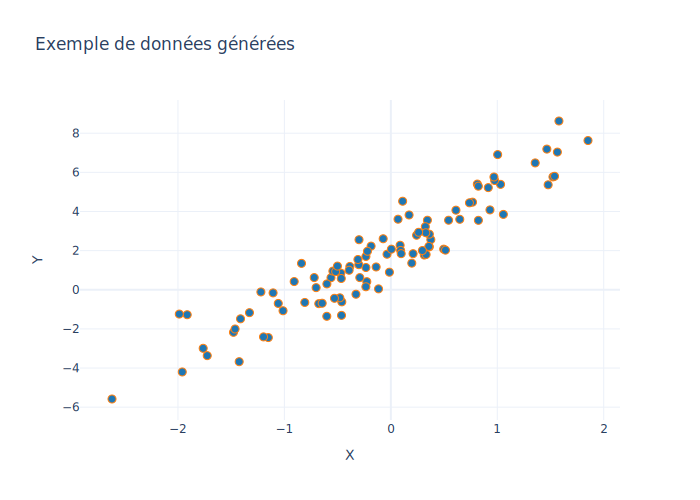

In [3]:
# Génération des données
np.random.seed(42)  # Fixer la graine pour rendre les résultats reproductibles
n_samples = 100

# Génération de X à partir d'une distribution normale
X = np.random.randn(n_samples)

# Relation vraie entre X et Y : f(x) = 3x + 2
true_slope = 3
true_intercept = 2
Y = true_slope * X + true_intercept

# Ajout de bruit à Y, tiré d'une distribution normale
noise = np.random.randn(n_samples)
Y_noisy = Y + noise

# Définition des couleurs pour le graphique
color_chart = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Palette de couleurs

# Création du graphique interactif avec Plotly
fig = go.Figure()

# Ajout des données
fig.add_trace(go.Scatter(
    x=X,
    y=Y_noisy,
    marker=dict(color=color_chart[0], size=8, line=dict(width=1, color=color_chart[1])),
    mode="markers",
    name="Données bruyantes"
))

# Configuration des axes et du titre
fig.update_layout(
    title="Exemple de données générées",
    xaxis_title="X",
    yaxis_title="Y",
    font=dict(size=12),
    template="plotly_white"  # Utilisation d'un thème clair
)

# Affichage du graphique
fig.show("svg")

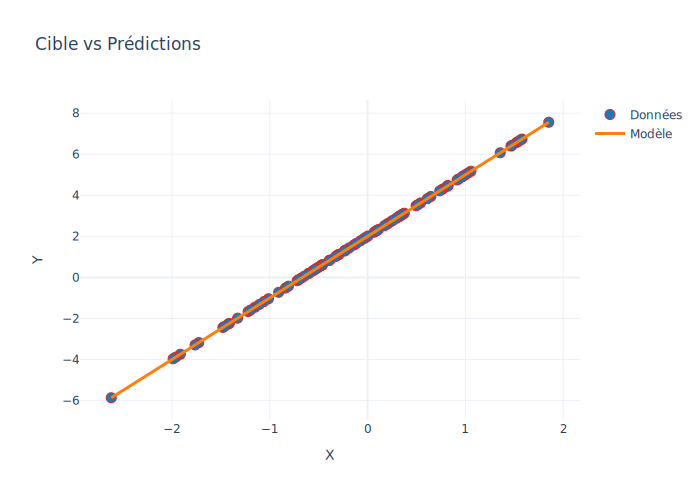

In [5]:
# Instanciation et ajustement du modèle de régression linéaire
linreg = LinearRegression()
X_reshaped = X.reshape(-1, 1)  # Reshape pour le modèle
linreg.fit(X_reshaped, Y)  # Entraînement du modèle

# Prédictions
predictions = linreg.predict(X_reshaped)

# Définition des couleurs pour le graphique
color_chart = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Palette de couleurs

# Création du graphique avec Plotly
fig = go.Figure()

# Ajout des données
fig.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode="markers",
    marker=dict(color=color_chart[0], size=10, line=dict(width=1, color=color_chart[-1])),
    name="Données"
))

# Ajout des prédictions du modèle
fig.add_trace(go.Scatter(
    x=X,
    y=predictions,
    mode="lines",
    line=dict(color=color_chart[1], width=3),
    name="Modèle"
))

# Configuration de la mise en page
fig.update_layout(
    title="Cible vs Prédictions",
    xaxis_title="X",
    yaxis_title="Y",
    font=dict(size=12),
    template="plotly_white"  # Thème clair pour une meilleure lisibilité
)

# Affichage du graphique
fig.show("svg")

# Cost/Loss Functions 💰💰

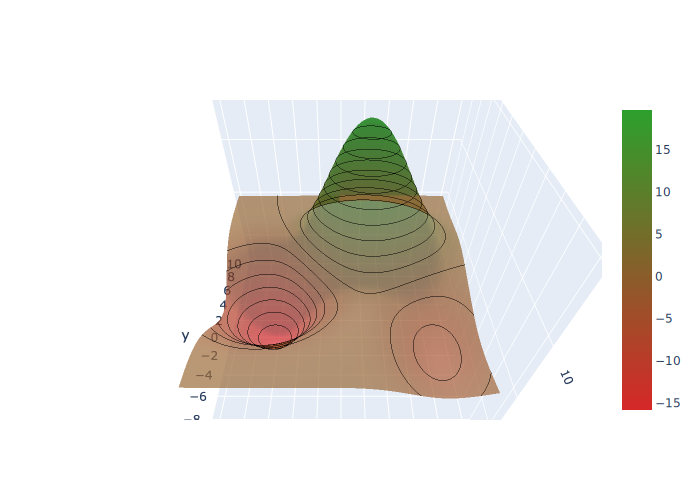

In [14]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='ij')
def func_3D(x,y):
  a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20) 
  b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20) 
  c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
  return a + b + c
y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)
fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.7)
  ]
)

fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
        })

fig.show("svg")

# Gradient 📉📉

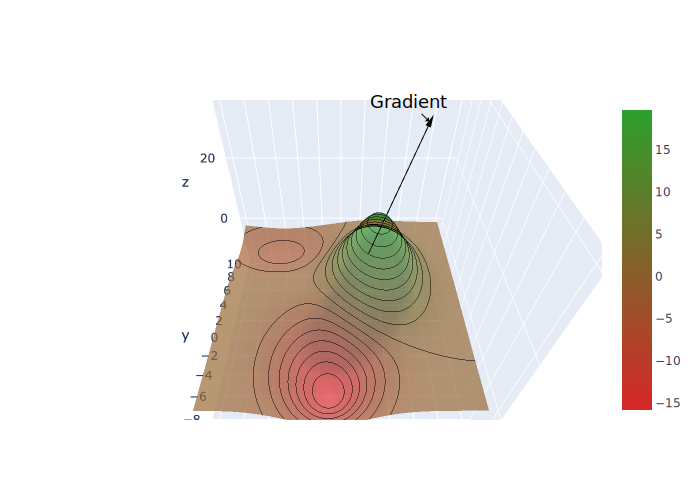

In [15]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='xy')
def func_3D(x,y):
  a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20) 
  b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20) 
  c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
  return a + b + c
y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)
fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.7),
    go.Cone(
        x=[xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        u=[y_gradient[0][50,60]],
        v=[y_gradient[1][50,60]],
        w=[y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=[xx1[50,60], xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60], xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60], y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        mode='lines',
        line=dict(
            color='black',
            width=2
        ))])
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
            "annotations":[dict(x=xx1[50,60] + y_gradient[0][50,60],
                                y=xx2[50,60] + y_gradient[1][50,60],
                                z=y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60] + 1,
                               text="Gradient",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1)]
        })
fig.show("svg")

# Gradient Descent algorithm ⚙️⚙️

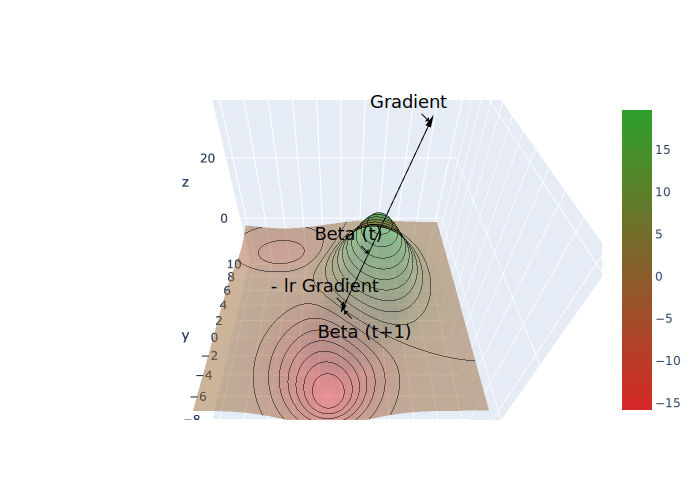

In [12]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='xy')
def func_3D(x,y):
  a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20) 
  b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20) 
  c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
  return a + b + c
y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)
fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.5),
    go.Cone(
        x=[xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        u=[y_gradient[0][50,60]],
        v=[y_gradient[1][50,60]],
        w=[y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=[xx1[50,60], xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60], xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60], y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        mode='lines',
        showlegend=False,
        line=dict(
            color='black',
            width=2,
            showscale=False
        )),
        go.Cone(
        x=[xx1[50,60] - 0.5*y_gradient[0][50,60]],
        y=[xx2[50,60] - 0.5*y_gradient[1][50,60]],
        z=[y[50,60] - 0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60])],
        u=[-0.5*y_gradient[0][50,60]],
        v=[-0.5*y_gradient[1][50,60]],
        w=[-0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60])],
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=[xx1[50,60], xx1[50,60] -0.5*y_gradient[0][50,60]],
        y=[xx2[50,60], xx2[50,60] -0.5*y_gradient[1][50,60]],
        z=[y[50,60], y[50,60] -0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60])],
        mode='lines',
        showlegend=False,
        line=dict(
            color='black',
            width=2,
            showscale=False
        )),
        go.Scatter3d(
        x=[xx1[50,60] -0.5*y_gradient[0][50,60], xx1[50,60] -0.5*y_gradient[0][50,60]],
        y=[xx2[50,60] -0.5*y_gradient[1][50,60], xx2[50,60] -0.5*y_gradient[1][50,60]],
        z=[y[50,60] -0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]),
           func_3D(xx1[50,60] -0.5*y_gradient[0][50,60], xx2[50,60] -0.5*y_gradient[1][50,60])],
        mode='lines',
        showlegend=False,
        line=dict(
            color='black',
            width=2,
            showscale=False
            )
        )
      ]
    )
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
            "annotations":[dict(x=xx1[50,60] + y_gradient[0][50,60],
                                y=xx2[50,60] + y_gradient[1][50,60],
                                z=y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60] + 1,
                               text="Gradient",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1),
                           dict(x=xx1[50,60],
                                y=xx2[50,60],
                                z=y[50,60],
                               text="Beta (t)",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1),
                           dict(x=xx1[50,60] -0.5*y_gradient[0][50,60],
                                y=xx2[50,60] -0.5*y_gradient[1][50,60],
                                z=func_3D(xx1[50,60] -0.5*y_gradient[0][50,60], xx2[50,60] -0.5*y_gradient[1][50,60]),
                               text="Beta (t+1)",
                               textangle=0,
                               ax=20,
                               ay=20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1),
                           dict(x=xx1[50,60] -0.5*y_gradient[0][50,60],
                                y=xx2[50,60] -0.5*y_gradient[1][50,60],
                                z=y[50,60] -0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]),
                               text="- lr Gradient",
                               textangle=0,
                               ax= -20,
                               ay= -20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1)
                           ]
        })
fig.show("svg")

# Gradient descent for a function with one minimum 👌👌

In [17]:
# Let us generate some input data :
beta = np.linspace(-10, 16, 1000)

# Now we define a function with a single minimum
def func(beta):
  return beta**2 - 6*beta + 14
y = func(beta)

# Let's plot this function
px.line(x=beta,y=y, color_discrete_sequence=color_chart, render_mode="svg")

In [18]:
# let's define a function to plot the gradient descent :
def plot_gradient_descent(beta, beta_list, func, gradient):
    # Let's visualise the different values of beta_optimum and the resulting value of the function
    import matplotlib.pyplot as plt

    # The plot: LHS is the data, RHS will be the loss function.
    fig, ax = plt.subplots(figsize=(15,10))

    # The loss function as a function of its single parameter, theta1.
    ax.plot(beta, y, 'k')

    # Annotate the loss function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    for j in range(1,len(beta_list)):
        ax.annotate('', xy=(beta_list[j], func(beta_list[j])), xytext=(beta_list[j-1], func(beta_list[j-1])),
                    arrowprops={'arrowstyle': '->', 'color': color_chart[-1], 'lw': 1},
                    va='center', ha='center')

    y_min, y_max = ax.get_ylim()

    for j in range(1,len(beta_list)):
        ax.annotate('', xy=(beta_list[j], y_min), xytext=(beta_list[j-1], y_min),
                        arrowprops={'arrowstyle': '->', 'color': color_chart[-1], 'lw': 1},
                        va='center', ha='center')

    for j in range(len(beta_list)):
        ax.annotate('beta{}'.format(j), xy=(beta_list[j], func(beta_list[j])), xytext=(beta_list[j], y_min - 0.05*(y_max - y_min)),
                    arrowprops={'arrowstyle': '-', 'color': color_chart[-1], 'lw': 1},
                    va='center', ha='center')


    # Labels, titles and a legend.
    ax.scatter(beta_list, func(np.array(beta_list)), c=color_chart[-2], s=40, lw=0)
    #ax.scatter(beta_list, np.zeros_like(beta_list)+y_min, c="red", s=40, lw=0)

    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(r'$C$')
    ax.set_title('Loss function')

    plt.show()

    print("The final value of beta is : {}".format(beta_optimum))